In [1]:
# univariate lstm example 
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [3]:
# define input sequence
# c = [10, 20, 30, 40, 50, 60, 70, 80, 90]
raw_seq = []
for i in range(10, 250, 10):
    raw_seq.append(i)
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))


In [4]:
# define model - Vanilla LSTM
model = Sequential()
model.add(LSTM(500, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
%time model.fit(X, y, epochs=200, verbose=0)
# demonstrate prediction
x_input = array([70, 80, 90])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

CPU times: user 52.9 s, sys: 2.71 s, total: 55.6 s
Wall time: 11.4 s
[[99.97314]]


In [5]:
# define model - Stacked LSTM
model = Sequential()
# NOTE : key is return_sequences=True between LSTM layers
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
%time model.fit(X, y, epochs=200, verbose=0)
# demonstrate prediction
x_input = array([70, 80, 90])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

CPU times: user 14.8 s, sys: 1.89 s, total: 16.7 s
Wall time: 7.33 s
[[99.94458]]


In [6]:
from keras.layers import Bidirectional
# define model
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
%time model.fit(X, y, epochs=200, verbose=0)
# demonstrate prediction
x_input = array([70, 80, 90])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

CPU times: user 14 s, sys: 1.87 s, total: 15.9 s
Wall time: 6.75 s
[[100.1051]]


In [41]:
# multivariate lstm example
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

# define input sequence
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
in_seq3 = array([25, 35, 45, 55, 65, 75, 85, 95, 105])
in_seq4 = array([-10, -20, -30, -40, -50, -60, -70, -80, -90])
out_seq = array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
in_seq3 = in_seq2.reshape((len(in_seq3), 1))
in_seq4 = in_seq2.reshape((len(in_seq4), 1))
out_seq = out_seq.reshape((len(out_seq), 1))





In [44]:
# horizontally stack raw_seqcolumns
dataset = hstack((in_seq1, in_seq2, in_seq3, in_seq4, out_seq))
# choose a number of time stepsraw_seq
dataset

array([[ 10,  15,  15,  15,  25],
       [ 20,  25,  25,  25,  45],
       [ 30,  35,  35,  35,  65],
       [ 40,  45,  45,  45,  85],
       [ 50,  55,  55,  55, 105],
       [ 60,  65,  65,  65, 125],
       [ 70,  75,  75,  75, 145],
       [ 80,  85,  85,  85, 165],
       [ 90,  95,  95,  95, 185]])

In [48]:
n_steps = 3
# convert into input/output
X, y = split_sequences(dataset, n_steps)
# the dataset knows the number of features, e.g. 2
n_features = X.shape[2]
print(n_features)
# define model
y

4


array([ 65,  85, 105, 125, 145, 165, 185])

In [ ]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
# fit model
%time history=model.fit(X, y, validation_split=0.33, epochs=200, batch_size=10, verbose=0)
# demonstrate predictionraw_seq
x_input = array([[80, 85, 95, -70], [90, 95, 105, -80], [100, 105, 115, -100]])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

In [38]:
print(yhat)

[[62.182518]]


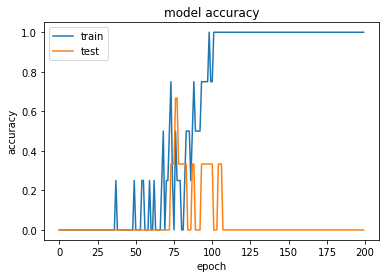

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline  
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

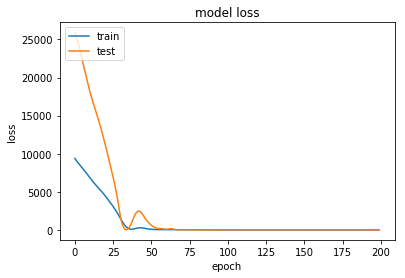

In [40]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

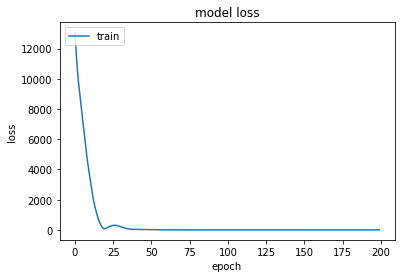

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline  
# summarize history for loss
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [9]:
import tensorflow as tf 
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))


In [10]:
sess


In [11]:
tf.Session(config=tf.ConfigProto(log_device_placement=True))
